In [51]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('netflix_titles.csv',index_col=False)
df['cast'] = df['cast'].fillna('No Info')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Info,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,No Info,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,No Info,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Netflix has more series or movies?

In [3]:
df['Contents'] = 1
netflix_type = df.groupby('type').sum()['Contents']
netflix_type

type
Movie      6131
TV Show    2676
Name: Contents, dtype: int64

In [19]:
netflix_type = df.groupby('type').sum()

plot = go.Figure(data=[go.Bar(y=netflix_type.index,x=netflix_type['Contents'],text=netflix_type['Contents'],textposition='outside',orientation='h')])
plot.update_layout(height=250, width=900,
                   title=go.layout.Title(
                    text="Type of Contents on Netflix <br><sup>Database: September, 2021</sup>",
                    xref="paper",
                    x=0))
    
plot

# Top 25 Directors

In [5]:
netflix_director = df.groupby('director').sum()
netflix_director = netflix_director.sort_values('Contents',ascending=False)
netflix_director = netflix_director.head(25)
netflix_director = netflix_director.sort_values('Contents',ascending=True)

plot = go.Figure(data=[go.Bar(y=netflix_director.index,x=netflix_director['Contents'],text=netflix_director['Contents'],textposition='outside',orientation='h')])
plot.update_layout(height=700, width=900,
                   title=go.layout.Title(
                    text="Top 25 most popular Directors on Netflix <br><sup>Database: September, 2021</sup>",
                    xref="paper",
                    x=0))
    
plot

# Distribution Movies by Country

In [6]:
netflix_country = df.groupby('country').sum()
netflix_country = netflix_country.sort_values('Contents',ascending = False)
netflix_country = netflix_country.head(25)
netflix_country = netflix_country.sort_values('Contents',ascending = True)


plot = go.Figure(data=[go.Bar(y=netflix_country.index,x=netflix_country['Contents'],text=netflix_country['Contents'],textposition='outside',orientation='h')])
plot.update_layout(height=700, width=1000,
                   title=go.layout.Title(
                    text="Top 25 most influent Countries for Netflix's Contents<br><sup>Database: September, 2021</sup>",
                    xref="paper",
                    x=0))
    
plot

# Distribution Movies by Category

In [7]:
netflix_category = df.groupby('listed_in').sum()
netflix_category = netflix_category.sort_values('Contents',ascending = False)
netflix_category = netflix_category.head(25)
netflix_category = netflix_category.sort_values('Contents',ascending = True)

plot = go.Figure(data=[go.Bar(y=netflix_category.index,x=netflix_category['Contents'],text=netflix_category['Contents'],textposition='outside',orientation='h')])
plot.update_layout(height=700, width=1000,
                   title=go.layout.Title(
                    text="Top 25 Categories of Netflix's Contents<br><sup>Database: September, 2021</sup>",
                    xref="paper",
                    x=0))
    
plot

# Recent Contents of Netflix

In [8]:
# working with dates:
df['date_added'] = pd.to_datetime(df['date_added'])

netflix_news = df.sort_values('date_added',ascending = False)
netflix_news = netflix_news.head(25)
netflix_news




,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Contents
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Info,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,1
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,No Info,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",1
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,1
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",1
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,No Info,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1


# Does Netflix has more focus on TV Shows than movies in recent years?

In [73]:
df['date_added'] = df['date_added'].dropna()
df['date_added'] = df['date_added'].astype(str)
df['year_added'] = df['date_added'].str[2:4]


recent_types = df_year.groupby(['year_added','type'],dropna=True,as_index=False).sum()
recent_types = recent_types.drop(columns=['release_year'])
recent_types

,year_added,type,Contents
0,08,Movie,1
1,08,TV Show,1
2,09,Movie,2
3,10,Movie,1
4,11,Movie,13
5,12,Movie,3
6,13,Movie,6
7,13,TV Show,5
8,14,Movie,19
9,14,TV Show,5


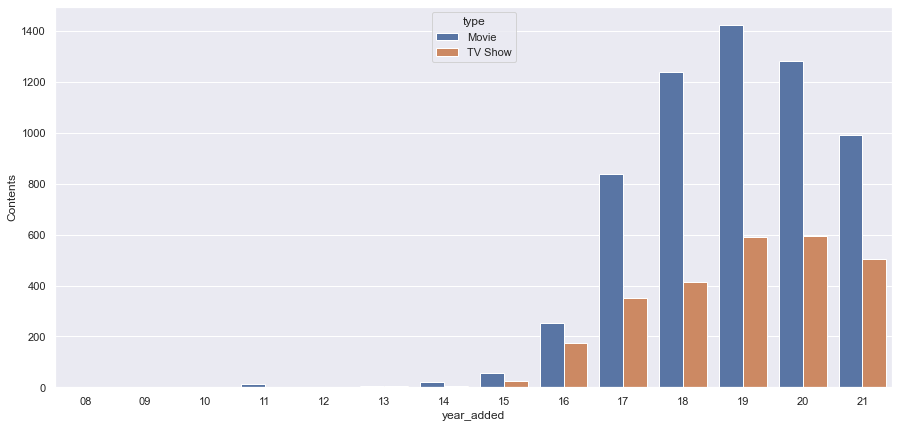

In [69]:
ax = sns.barplot(x="year_added", y="Contents", hue="type", data=recent_types)

# Oldest Movies Realesed

In [11]:
netflix_oldest = df.sort_values('release_year')
netflix_oldest.head(50)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Contents,year_added
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,No Info,NaN,2018-12-30,1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,1,18
7790,s7791,Movie,Prelude to War,Frank Capra,No Info,United States,2017-03-31,1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,1,17
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,2017-03-31,1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,1,17
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,No Info,United States,2017-03-31,1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,1,17
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",No Info,United States,2017-03-31,1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,1,17
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,No Info,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,1,17
8640,s8641,Movie,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom",2017-03-31,1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,1,17
8436,s8437,Movie,The Negro Soldier,Stuart Heisler,No Info,United States,2017-03-31,1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...,1,17
8419,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,No Info,United States,2017-03-31,1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,1,17
7930,s7931,Movie,San Pietro,John Huston,No Info,United States,2017-03-31,1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",1,17


# Contents with favorite Actor

In [12]:
favorite_actor = df["cast"].str.contains('Jennifer Lawrence')
df.query("@favorite_actor")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Contents,year_added
251,s252,Movie,Like Crazy,Drake Doremus,"Anton Yelchin, Felicity Jones, Jennifer Lawren...",United States,2021-08-19,2011,PG-13,91 min,"Dramas, Independent Movies, Romantic Movies",A spirited exchange student and an American ma...,1,21
702,s703,Movie,Silver Linings Playbook,David O. Russell,"Bradley Cooper, Jennifer Lawrence, Robert De N...",United States,2021-06-17,2012,R,122 min,"Comedies, Dramas, Independent Movies",A man with bipolar disorder moves home with hi...,1,21
7009,s7010,Movie,House at the End of the Street,Mark Tonderai,"Gil Bellows, Max Thieriot, Jennifer Lawrence, ...","United States, Canada",2020-05-08,2012,PG-13,101 min,"Horror Movies, Thrillers",Moving to a new town proves even more stressfu...,1,20
8750,s8751,Movie,Winter's Bone,Debra Granik,"Jennifer Lawrence, John Hawkes, Kevin Breznaha...",United States,2019-03-01,2010,R,100 min,"Dramas, Independent Movies","In this unflinching noir drama, a resilient te...",1,19
